This project is structured to explore concepts and derive Conclusiuons in a workbook semi structured fashion. It is an exploratory project, not designed to be comprhensive or designed finish product structured. It serves to provide comprehensive notations on topics explored. The following is the basic workflow: 


 **1. Data Loading Block:**
Purpose: This initial block is used to load the medical records dataset (medrecords.csv) into a pandas DataFrame.
What's Executed: The dataset is read from a file using pandas.read_csv(), and the first few rows of the dataset are displayed for verification. The dataset contains various health-related features such as Age, Gender, Heart Disease, Stroke, Exam Score, and High Alcohol.
Outcome: The dataset is successfully loaded into memory, and its structure and content are confirmed through a preview of the first few rows.(DESCRIBE THE TYPES OF DATA SEEN AND THE ANTICIPATED STEPS THAT WILL BE NECESSARY SINCE THIS IS A MACHINE LEARNING PROJECT)

**2. Creating the Trauma Target Column:**
Purpose: This block creates the Trauma column, which serves as the target variable for machine learning models.
What's Executed:
The Trauma column is initialized with all values set to 0.
A series of conditions are applied to probabilistically assign 1 (trauma) to rows based on different health factors:
Individuals aged 65 or older have a 50% chance of trauma.
Individuals with Alzheimer's have a 75% chance.
Individuals with High Alcohol, Heart Disease, Stroke, and low Exam Score are probabilistically assigned trauma based on different probabilities.
Remaining rows are assigned trauma with a 10% chance.
Outcome: The Trauma target column is created, and the dataset is now labeled for a classification task. Trauma percentages are also calculated and displayed, giving insight into the distribution of trauma cases across the dataset.

**Output Summary**

- **37.57%** of the dataset rows are marked as having trauma.
- Trauma distribution by age group:
  - **18-44**: 31.11% have trauma.
  - **45-64**: 32.82% have trauma.
  - **65+**: 57.57% have trauma.


**General Predictions About Machine Learning Success**
- Given the deterministic rules and probabilistic nature of the trauma assignment, machine learning models are likely to learn the associations between trauma and health conditions like age, Alzheimer's, alcohol consumption, heart disease, stroke, and exam scores.
- Features such as **Alzheimer's**, **Age**, and **Stroke** should exhibit stronger correlations with trauma due to their higher trauma assignment probabilities.
- **Success in prediction** depends on how well these conditions align with the overall trauma distribution. However, since trauma has been probabilistically assigned, machine learning models like **XGBoost** should be able to detect patterns effectively.
- With a **37.57% trauma rate**, the data is moderately balanced, making it feasible to train machine learning models without significant bias towards one class.

**3. One-Hot Encoding and Data Preparation for Machine Learning:**
Purpose: This block prepares the dataset for machine learning by transforming categorical variables into a suitable format and splitting the dataset.
What's Executed:
**One-hot encoding** is applied to categorical variables such as Gender, Age Group, and Exam Age, converting them into binary columns (e.g., Gender_Male, Age Group_45-64).
The dataset is split into features (X) and target (y), where X contains all columns except Trauma, and y is the Trauma column.
The data is split into training and testing sets (80% for training, 20% for testing).
Outcome: The dataset is now preprocessed and split into training and testing sets, ready for model training.

4. **XGBoost Model** Training and Evaluation:
Purpose: Train an XGBoost classifier to predict trauma based on medical records.
XGBoost is an efficient and powerful implementation of gradient boosting designed for speed, accuracy, and flexibility.
It uses sequential decision trees to minimize the prediction error and applies gradient descent to optimize performance.
Regularization techniques, feature subsampling, and parallelism allow XGBoost to handle large datasets while preventing overfitting.
The High Alcohol feature's dominance, as identified in subsequent analysis, is the result of XGBoost assigning significant importance to features that strongly correlate with the target variable (Trauma), which may require scaling or tuning adjustments.(Not executed in this exploratory project. )

When using XGBoost, tuning its hyperparameters can significantly impact model performance. Key hyperparameters include:

**n_estimators:** The number of trees to build.
n_estimators (Number of Trees)
Description:
This controls the number of trees that are built sequentially in the ensemble model. In gradient boosting, each new tree attempts to reduce the error of the previous trees.
More trees allow the model to correct more errors, but too many trees can lead to overfitting.
Default: 100
When to Alter:
Increase: If the model is underfitting (i.e., it has high bias and is too simple), increasing n_estimators allows the model to capture more complex patterns. This is often paired with a lower learning_rate.
Decrease: If the model is overfitting (i.e., performing very well on training data but poorly on test data), reducing n_estimators might help by preventing over-complexity.
Best Practice: Increasing n_estimators should usually be accompanied by a reduction in learning_rate to avoid overfitting, as more trees increase the risk of memorizing the training data.

**max_depth**: The maximum depth of each tree, which controls the complexity of the model. (Maximum Depth of Each Tree)
Description:
This controls the maximum depth of each decision tree in the model. The depth of the tree indicates how many times the model can split the data on different features. Deeper trees can model more complex relationships but also increase the risk of overfitting.
Default: 6
When to Alter:
Increase: If the model is underfitting and failing to capture the complexity of the data, increasing max_depth allows the trees to split the data more finely and learn more intricate patterns.
Decrease: If the model is overfitting, reducing max_depth limits the model's capacity to make overly specific splits and forces it to focus on more general patterns.
Best Practice: Start with a small depth (e.g., 3-6) to prevent overfitting, especially on small or noisy datasets. Gradually increase max_depth if the model is underfitting.

**learning_rate**(aka eta): Controls how much each tree contributes to the final predictions. A smaller learning rate requires more trees.
Description:
This controls the contribution of each tree to the final prediction. It acts as a shrinkage factor on the tree’s predictions, reducing their impact and making the model learn more slowly.
A smaller learning_rate means each tree corrects only a small portion of the error, requiring more trees to achieve the same results.
Default: 0.3
When to Alter:
Decrease: If the model is overfitting or you want to improve the generalization ability, decrease the learning_rate. This often requires increasing the number of trees (n_estimators) to make up for the smaller contribution of each tree.
Increase: If the model is underfitting or training is too slow, a higher learning_rate can speed up learning by making each tree more impactful.
Best Practice: Lower learning_rate values (e.g., 0.01-0.1) are generally preferred to ensure the model learns gradually and doesn't overfit. Pair this with a higher n_estimators (number of trees) for best results.

**min_child_weight** Controls the minimum sum of instance weights (hessian) needed in a child node, affecting when splits occur.
Description:
This parameter controls the minimum sum of the instance weights (hessian) required in a child node. In simpler terms, it governs the minimum number of samples that a tree node must have in order to make a split.
Default: 1
When to Alter:
Increase: If the model is overfitting, increasing min_child_weight ensures that nodes must have a larger number of samples before they can split, thus preventing overly specific splits.
Decrease: If the model is underfitting or struggling to make good splits, lowering min_child_weight allows the model to create more specific branches in the tree by allowing splits with fewer samples.
Best Practice: Start with the default value and increase it if the model is overfitting or has many noisy splits. A higher min_child_weight (e.g., 5-10) forces the model to generalize more.

**gamma:** Controls the minimum reduction in the loss function needed for a split to occur.
Description:
This parameter controls the minimum reduction in the loss function that a split needs to achieve in order to be made. If a split doesn't meet this reduction threshold, it is not created. This parameter can be used to control overfitting.
Default: 0
When to Alter:
Increase: If the model is overfitting, increasing gamma forces the model to only make splits that significantly reduce the error. This reduces the tendency to make unnecessary, small improvements in the training data.
Decrease: In rare cases where the model is underfitting, decreasing gamma allows the model to make more splits even when the error reduction is small.
Best Practice: Start with gamma = 0 (the model splits freely) and increase it if the model starts to overfit. Higher values like 1-5 can help prevent overfitting in very complex datasets.

**subsample:** The percentage of training instances used to grow each tree, controlling overfitting.
subsample
Description:
This parameter controls the percentage of the training data used to build each tree. By sampling only a fraction of the data, the model introduces randomness, which can help prevent overfitting and improve generalization.
Default: 1 (100% of the data is used)
When to Alter:
Decrease: If the model is overfitting, reduce subsample to introduce more randomness and make the model less dependent on the full training set. Typical values are between 0.5 and 0.8.
Increase: If the model is underfitting or not learning enough from the data, increasing subsample ensures that each tree has access to more of the training data.
Best Practice: Set subsample to a value between 0.5 and 0.8 to prevent overfitting. This works especially well in large datasets where using a portion of the data for each tree is computationally efficient and beneficial for generalization.



**colsample_bytree:** The fraction of features used in each tree, which reduces correlation between trees and helps prevent overfitting.
Description:
This parameter controls the fraction of features (columns) used by each tree. By using only a subset of features for each tree, colsample_bytree introduces diversity into the trees, reducing the likelihood of the model overfitting.
Default: 1 (100% of the features are used in each tree)
When to Alter:
Decrease: If the model is overfitting, reducing colsample_bytree ensures that each tree only has access to a subset of features, which helps prevent reliance on any one feature or set of features. Common values range from 0.3 to 0.8.
Increase: If the model is underfitting, increasing colsample_bytree allows the model to use more features, which can help it learn more complex patterns in the data.
Best Practice: A value between 0.5 and 0.8 is often optimal for balancing overfitting and underfitting, especially when you have a large number of features. This is similar to how Random Forests use feature bagging.




What's Executed:
The XGBoost classifier is trained on the training set.
Predictions are made on the test set.
The performance of the model is evaluated using metrics such as:
Accuracy: How often the model correctly predicts trauma.
Precision: The proportion of trauma predictions that are correct.
Recall: The proportion of actual trauma cases that are correctly identified.
F1 Score: The harmonic mean of precision and recall.
Outcome: The XGBoost model is trained, and performance metrics are calculated and displayed. The model's effectiveness at predicting trauma is assessed through accuracy, precision, recall, and F1 score.

**Accuracy**: 68.84%
  - This indicates that about 69% of the model’s predictions are correct, which is moderate but not exceptional.
  
- **Precision**: 56.49%
  - Precision is relatively low, meaning that when the model predicts trauma, it is only correct 56% of the time. This suggests that the model is  generating a relatively high number of false positives (cases where it incorrectly predicts trauma).
  
- **Recall**: 75.08%
  - Recall is higher, indicating that the model correctly identifies 75% of actual trauma cases. This is a positive sign as it means that most trauma cases are being caught by the model.
  
- **F1 Score**: 64.47%
  - The F1 score is a balance between precision and recall. A score of **64.47%** is considered moderate, meaning the model strikes a fair balance between identifying trauma cases and avoiding false positives.

  The lower precision is not necessarily a flaw in the model, but rather a consequence of the way trauma was assigned in the dataset and the model's bias towards maximizing recall. Improvements could be made by refining the feature set or tuning the model to better balance precision and recall based on the use case requirements.

- The initial XGBoost model demonstrates moderate performance with an F1 score of **64.47%**. The high recall shows the model is effective at identifying trauma cases, but the lower precision suggests room for improvement, particularly in reducing false positives. Further tuning or feature engineering might be needed to improve the precision without significantly sacrificing recall.

  

**5. Feature Importance**
Purpose: This block analyzes the importance of different features in the trained XGBoost model.
What's Executed:
Feature importances are extracted from the XGBoost model and ranked in descending order.
A bar plot is generated to visualize the importance of each feature in making predictions.
The importance of the High Alcohol feature is found to be much higher compared to other features, highlighting its significant influence in trauma prediction.
Outcome: The High Alcohol feature stands out as the most influential variable, prompting further exploration and adjustment in subsequent modeling efforts.

The **top 5 features** contributing to trauma prediction are:
  1. **High Alcohol**: 0.6362 (by far the most important feature)
  2. **Heart Disease**: 0.0987
  3. **Stroke**: 0.0790
  4. **Age**: 0.0712
  5. **Alzheimers**: 0.0105
  

**6. Confusion Matrix Visualization:**
Purpose: Visualize the model's performance through a confusion matrix.
What's Executed:
A confusion matrix is generated based on the test set predictions, showing the number of true positives (correct trauma predictions), false positives, true negatives, and false negatives.
The confusion matrix is plotted as a heatmap for easier interpretation.
Outcome: The confusion matrix provides a visual breakdown of the model’s performance, showing where it made correct predictions and errors.

**7. Random Forest Model with Feature Scaling (Optional Block):**
Purpose: Experiment with scaling down the importance of the High Alcohol feature to observe its effect on model performance.
What's Executed:
The dataset is copied, and the High Alcohol feature is scaled down by dividing its values by a scaling factor (2, 3, or 4).
A Random Forest classifier is trained on the scaled data, and the same evaluation metrics (accuracy, precision, recall, and F1 score) are computed.


Outcome: The impact of reducing the weight of the High Alcohol feature is analyzed by observing how the Random Forest model’s performance changes under different scaling factors.

**Chain of Events (Summary of the Flow):**
Data Loading: Load the medical records data into a pandas DataFrame.

Create Trauma Column: Probabilistically assign trauma values to the dataset based on various health conditions.

Data Preparation: Apply one-hot encoding to categorical features and split the dataset into training and testing sets.

XGBoost Model: Train the XGBoost model on the training set and evaluate it using accuracy, precision, recall, and F1 score.
Feature Importance Analysis: Identify the importance of different features in the XGBoost model, with High Alcohol standing out as the most influential.
Confusion Matrix: Visualize the model’s performance using a confusion matrix.

Random Forest Experiment: Experiment with down-weighting High Alcohol and train a Random Forest model to observe the effects on predictions.
Accomplishments:
Successfully built predictive models (XGBoost and Random Forest) to determine the likelihood of trauma based on medical records.
Created a probabilistically constructed Trauma target variable using various health-related conditions.
Preprocessed the data via one-hot encoding and trained models with different configurations.
The analysis revealed that High Alcohol was the most important feature in trauma prediction, leading to further experimentation with scaling its influence.
Experimented with scaling the High Alcohol feature to observe its effect on model performance, using Random Forest for comparison.
Visualized model performance through confusion matrices and evaluated using standard machine learning metrics.

XGBoost Hyperparameter tuning results versus 1st Run with Default Settings
Summary of Improvement:
Lower learning rate and fewer trees allowed the model to generalize better.
A reduced tree depth helped the model avoid overfitting.
The improvement in recall suggests the model is better at identifying trauma cases, while the slight drop in precision indicates that it's making more false positives, but that trade-off increased the overall F1 score.



### Code Summary
- The provided code loads a CSV file (`medrecords.csv`) containing medical records data into a pandas DataFrame.
- It uses the `pd.read_csv()` function to load the file from the specified path on the desktop.
- The first few rows of the DataFrame are displayed using the `head()` method to verify that the data has been loaded correctly.

### Output Summary
- The output displays the first five rows of the DataFrame, showing various medical attributes like `Gender`, `Age`, `Age Group`, `BMI`, and several medical conditions (e.g., `Heart Disease`, `Stroke`).
- The dataset contains both numeric and categorical data related to the health and conditions of individuals, including columns such as `Exam Score`, `Alzheimers`, `COPD`, and more.


In [129]:
import pandas as pd

# Path to the medrecords.csv file on your Desktop
file_path = '/Users/steventuschman/Desktop/medrecords.csv'

# Load the CSV file into a DataFrame
medrecords_df = pd.read_csv(file_path)

# Display the first few rows to verify it loaded correctly
print(medrecords_df.head())


   Gender  Age Age Group   BMI  Obesity  Smoking  High Alcohol  Heart Disease  \
0    Male   27     18-44  22.7        0        0             0              0   
1  Female   54     45-64  28.5        0        0             0              0   
2    Male   21     18-44  21.3        0        0             1              0   
3  Female   62     45-64  28.6        0        0             0              0   
4    Male   61     45-64  21.4        0        0             1              0   

   Cancer  COPD  Alzheimers  Diabetes  CKD  High Blood Pressure  Stroke  \
0       0     0           0         0    0                    0       0   
1       0     0           0         1    0                    0       0   
2       0     0           0         0    0                    0       0   
3       0     0           0         0    0                    0       0   
4       0     0           0         0    0                    0       0   

   Liver Dx  Strength Exam Age  Exam Score  
0         1      

### Code Summary
- The code creates a new column, `Trauma`, in a dataset (`medrecords.csv`) containing medical records.
- Trauma is assigned deterministically using a combination of probabilities based on various health-related factors:
  - **50% chance** for individuals aged 65 and over.
  - **75% chance** for individuals with Alzheimer's.
  - **50% chance** for individuals who consume high amounts of alcohol.
  - **45% chance** for individuals with heart disease.
  - **65% chance** for individuals with a stroke.
  - **70% chance** for individuals with an exam score below 40.
  - **10% chance** for remaining individuals who don’t meet any of these conditions.
- The code then calculates the percentage of rows with trauma and breaks down the trauma distribution by age group.

### Output Summary
- The first five rows of the dataset are shown, including various medical attributes (e.g., `Gender`, `Age`, `High Alcohol`, `Heart Disease`, and `Trauma`).
- **37.57%** of the dataset rows are marked as having trauma.
- Trauma distribution by age group:
  - **18-44**: 31.11% have trauma.
  - **45-64**: 32.82% have trauma.
  - **65+**: 57.57% have trauma.
- These distributions are the result of the probabilistic trauma assignment based on the conditions described above.

### General Predictions About Machine Learning Success
- Given the deterministic rules and probabilistic nature of the trauma assignment, machine learning models are likely to learn the associations between trauma and health conditions like age, Alzheimer's, alcohol consumption, heart disease, stroke, and exam scores.
- Features such as **Alzheimer's**, **Age**, and **Stroke** should exhibit stronger correlations with trauma due to their higher trauma assignment probabilities.
- **Success in prediction** depends on how well these conditions align with the overall trauma distribution. However, since trauma has been probabilistically assigned, machine learning models like **XGBoost** should be able to detect patterns effectively.
- With a **37.57% trauma rate**, the data is relatively balanced, making it feasible to train machine learning models without significant bias towards one class.


In [130]:
import pandas as pd
import numpy as np

# Path to the medrecords.csv file on your Desktop
file_path = '/Users/steventuschman/Desktop/medrecords.csv'

# Load the CSV file into a DataFrame
medrecords_df = pd.read_csv(file_path)

# Create the new 'Trauma' column, initialized to 0
medrecords_df['Trauma'] = 0

# Assign 50% trauma for Age >= 65
age_65_and_over = medrecords_df['Age'] >= 65
medrecords_df.loc[age_65_and_over, 'Trauma'] = np.random.choice([0, 1], size=age_65_and_over.sum(), p=[0.5, 0.5])

# Assign 75% trauma for rows with Alzheimers
alzheimers = medrecords_df['Alzheimers'] == 1
medrecords_df.loc[alzheimers, 'Trauma'] = np.random.choice([0, 1], size=alzheimers.sum(), p=[0.25, 0.75])

# Assign 50% trauma for rows with High Alcohol
high_alcohol = medrecords_df['High Alcohol'] == 1
medrecords_df.loc[high_alcohol, 'Trauma'] = np.random.choice([0, 1], size=high_alcohol.sum(), p=[0.5, 0.5])

# Assign 45% trauma for rows with Heart Disease
heart_disease = medrecords_df['Heart Disease'] == 1
medrecords_df.loc[heart_disease, 'Trauma'] = np.random.choice([0, 1], size=heart_disease.sum(), p=[0.55, 0.45])

# Assign 65% trauma for rows with Stroke
stroke = medrecords_df['Stroke'] == 1
medrecords_df.loc[stroke, 'Trauma'] = np.random.choice([0, 1], size=stroke.sum(), p=[0.35, 0.65])

# Assign 70% trauma for rows with Exam Score below 40
low_exam_score = medrecords_df['Exam Score'] < 40
medrecords_df.loc[low_exam_score, 'Trauma'] = np.random.choice([0, 1], size=low_exam_score.sum(), p=[0.3, 0.7])

# For remaining rows that don't fall into any of the above categories, assign 10% trauma
remaining_rows = (medrecords_df['Trauma'] == 0)
medrecords_df.loc[remaining_rows, 'Trauma'] = np.random.choice([0, 1], size=remaining_rows.sum(), p=[0.9, 0.1])

# View the first 5 rows of the modified DataFrame
print(medrecords_df.head())

# Calculate percentage of rows with trauma
total_rows = len(medrecords_df)
trauma_count = medrecords_df['Trauma'].sum()
percent_trauma = (trauma_count / total_rows) * 100
print(f"Percentage of rows with trauma: {percent_trauma:.2f}%")

# Calculate percentage of rows with trauma by age group
trauma_by_age_group = medrecords_df.groupby('Age Group')['Trauma'].mean() * 100
print("Percentage of rows with trauma by age group:")
print(trauma_by_age_group)


   Gender  Age Age Group   BMI  Obesity  Smoking  High Alcohol  Heart Disease  \
0    Male   27     18-44  22.7        0        0             0              0   
1  Female   54     45-64  28.5        0        0             0              0   
2    Male   21     18-44  21.3        0        0             1              0   
3  Female   62     45-64  28.6        0        0             0              0   
4    Male   61     45-64  21.4        0        0             1              0   

   Cancer  COPD  Alzheimers  Diabetes  CKD  High Blood Pressure  Stroke  \
0       0     0           0         0    0                    0       0   
1       0     0           0         1    0                    0       0   
2       0     0           0         0    0                    0       0   
3       0     0           0         0    0                    0       0   
4       0     0           0         0    0                    0       0   

   Liver Dx  Strength Exam Age  Exam Score  Trauma  
0        

### Results of Initial XGBoost Run

- **Accuracy**: 68.84%
  - This indicates that about 69% of the model’s predictions are correct, which is moderate but not exceptional.
  
- **Precision**: 56.49%
  - Precision is relatively low, meaning that when the model predicts trauma, it is only correct 56% of the time. This suggests that the model is  generating a relatively high number of false positives (cases where it incorrectly predicts trauma).
  
- **Recall**: 75.08%
  - Recall is higher, indicating that the model correctly identifies 75% of actual trauma cases. This is a positive sign as it means that most trauma cases are being caught by the model.
  
- **F1 Score**: 64.47%
  - The F1 score is a balance between precision and recall. A score of **64.47%** is considered moderate, meaning the model strikes a fair balance between identifying trauma cases and avoiding false positives.
  
### Confusion Matrix
- **True Positives (TP)**: 14,136 – These are trauma cases correctly predicted as trauma.
- **False Positives (FP)**: 10,890 – These are non-trauma cases that were incorrectly predicted as trauma.
- **False Negatives (FN)**: 4,691 – These are trauma cases that were missed by the model.
- **True Negatives (TN)**: 20,283 – These are non-trauma cases correctly identified as non-trauma.

### Insights on Low Precision
The **low precision** of **56.49%** indicates that the model is predicting a considerable number of **false positives** (non-trauma cases incorrectly classified as trauma). This can be explained by factors **specific to this dataset and model**:

1. **Known Trauma Distribution**:
   - We know that **37.57%** of the cases in the dataset are labeled as trauma, meaning the dataset is moderately imbalanced towards non-trauma cases. 
   - With this imbalance, the model tends to predict a higher proportion of trauma to balance out the overall predictions. This results in a higher **recall** but lower **precision**, as the model captures many true trauma cases at the cost of also labeling many non-trauma cases as trauma.

2. **Correlation with Trauma**:
   - From previous analysis, we know that certain features such as **Age ≥ 65**, **Alzheimers**, **Stroke**, and **Low Exam Scores** are highly associated with trauma due to the deterministic way trauma was assigned.
   - While these features are strongly correlated with trauma, other features like **Obesity**, **Smoking**, or **Heart Disease** might have weaker or more complex correlations.
   - The model likely over-relies on certain conditions that were used in the deterministic trauma assignment process. For instance, while **Heart Disease** and **High Alcohol** are assigned moderate probabilities for trauma (45% and 50%, respectively), they may not be strong enough indicators on their own, leading the model to falsely predict trauma for some of these cases.

3. **False Positives Explained by Weak Correlations**:
   - Features with **weaker correlations** (e.g., **High Alcohol**, **Heart Disease**) are more likely to contribute to **false positives**. The model may predict trauma in cases where these conditions are present, but since their correlation with trauma is not as strong, it incorrectly labels these individuals as trauma cases, thus lowering precision.
   - Specifically, conditions like **Exam Scores above 40** or individuals without significant health conditions (where trauma is randomly assigned) may cause the model to make incorrect predictions.

4. **Model Bias Towards Maximizing Recall**:
   - The XGBoost model might be favoring **recall over precision** in this case because trauma is a relatively serious outcome that the model aims not to miss. As a result, the model errs on the side of predicting trauma more frequently, leading to more false positives and lower precision.
   
### Conclusion:
The lower precision is not necessarily a flaw in the model, but rather a consequence of the way trauma was assigned in the dataset and the model's bias towards maximizing recall. Improvements could be made by refining the feature set or tuning the model to better balance precision and recall based on the use case requirements.

### General Conclusion
- The initial XGBoost model demonstrates moderate performance with an F1 score of **64.47%**. The high recall shows the model is effective at identifying trauma cases, but the lower precision suggests room for improvement, particularly in reducing false positives. Further tuning or feature engineering might be needed to improve the precision without significantly sacrificing recall.


Accuracy: 0.6884
Precision: 0.5641
Recall: 0.7634
F1 Score: 0.6488


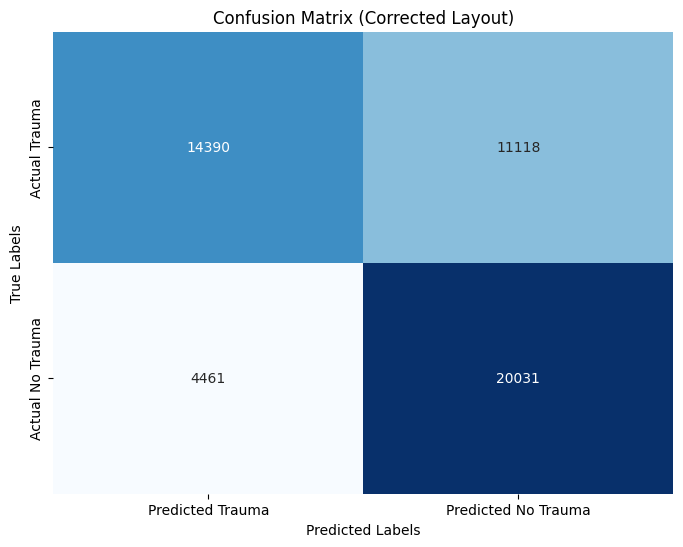

Corrected Confusion Matrix:
[[14390 11118]
 [ 4461 20031]]


In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
# Assuming medrecords_df is your DataFrame with trauma data

# One-hot encode categorical variables (e.g., 'Gender', 'Age Group', etc.)
categorical_columns = ['Gender', 'Age Group', 'Exam Age']  # Add more if necessary
encoded_df = pd.get_dummies(medrecords_df, columns=categorical_columns, drop_first=True)

# Features (all columns except 'Trauma') and Target (the 'Trauma' column)
X = encoded_df.drop('Trauma', axis=1)
y = encoded_df['Trauma']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Reorder the confusion matrix to match TP, FP, FN, TN layout
conf_matrix_corrected = np.array([[conf_matrix[1, 1], conf_matrix[0, 1]],  # TP, FP
                                  [conf_matrix[1, 0], conf_matrix[0, 0]]]) # FN, TN

# Plot the corrected confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_corrected, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Trauma', 'Predicted No Trauma'], 
            yticklabels=['Actual Trauma', 'Actual No Trauma'])
plt.title('Confusion Matrix (Corrected Layout)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the corrected confusion matrix for reference
print("Corrected Confusion Matrix:")
print(conf_matrix_corrected)



### Code Summary
- The provided code calculates the feature importance of each input variable in the trained XGBoost model using the `feature_importances_` attribute.
- The importance scores are stored in a pandas DataFrame and then visualized through a bar plot to highlight the most important features contributing to trauma prediction.
- The importance scores indicate how much each feature contributes to the model’s prediction of trauma.

### Output Summary
- The **top 5 features** contributing to trauma prediction are:
  1. **High Alcohol**: 0.6362 (by far the most important feature)
  2. **Heart Disease**: 0.0987
  3. **Stroke**: 0.0790
  4. **Age**: 0.0712
  5. **Alzheimers**: 0.0105
  
- **High Alcohol** has the highest importance score (**0.6362**), making it the most influential feature in the model’s prediction of trauma. Other features, such as **Heart Disease** and **Stroke**, also contribute but to a much lesser extent.

### Analysis of High Alcohol and Potential Improvement
- **High Alcohol** has an overwhelmingly high importance score (0.6362), meaning that it dominates the model’s decision-making process.
- Given this, eliminating **High Alcohol** from the model may reduce over-reliance on this single feature and encourage the model to make better use of other features.
  
  **Possible Outcomes of Eliminating High Alcohol**:
  1. **Positive Impact**: By removing High Alcohol, the model may better utilize other important features like **Heart Disease**, **Stroke**, and **Age**, potentially leading to more balanced predictions and improved generalization.
  2. **Negative Impact**: Since **High Alcohol** is a major predictor of trauma in this dataset, removing it might result in a significant loss of predictive power, reducing the model's overall performance (e.g., lower recall or accuracy).

### Conclusion
While eliminating **High Alcohol** could help reduce over-reliance on a single dominant feature and force the model to explore other patterns in the data, it could also risk lowering performance due to the significant predictive power of High Alcohol in this particular dataset. It may be worth experimenting with removing or down-weighting **High Alcohol** to see how it affects the balance between precision and recall.


Feature Importance:
                Feature  Importance
4          High Alcohol    0.645779
5         Heart Disease    0.089996
12               Stroke    0.084818
0                   Age    0.067502
8            Alzheimers    0.009199
19       Exam Age_30-39    0.008046
15           Exam Score    0.007953
22       Exam Age_60-69    0.006970
2               Obesity    0.006642
17      Age Group_45-64    0.006300
20       Exam Age_40-49    0.006085
7                  COPD    0.005905
1                   BMI    0.005336
14             Strength    0.005248
11  High Blood Pressure    0.005169
3               Smoking    0.005026
21       Exam Age_50-59    0.004986
13             Liver Dx    0.004925
6                Cancer    0.004921
16          Gender_Male    0.004877
10                  CKD    0.004827
9              Diabetes    0.004784
23       Exam Age_70-79    0.004704
18        Age Group_65+    0.000000
24         Exam Age_80+    0.000000


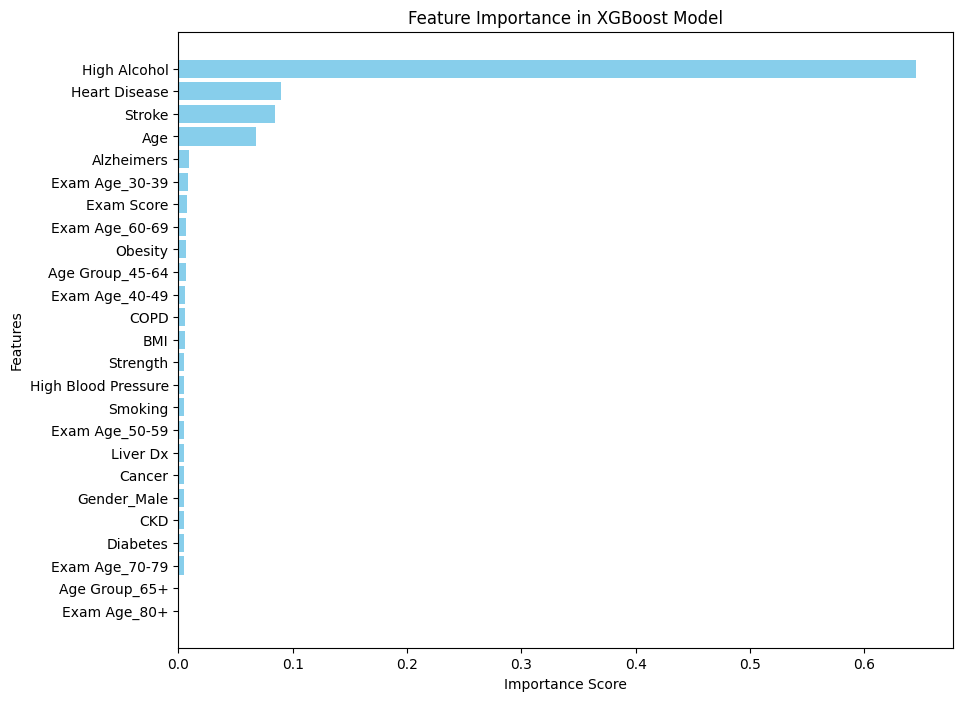

In [132]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming the XGBoost model is already trained as xgb_model

# Get feature importance scores
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("Feature Importance:")
print(features_df)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'medrecords_df' is your pre-processed DataFrame

# Step 1: One-hot encode categorical variables (e.g., 'Gender', 'Age Group', etc.)
categorical_columns = ['Gender', 'Age Group', 'Exam Age']  # Add more if necessary
encoded_df_rf = pd.get_dummies(medrecords_df, columns=categorical_columns, drop_first=True)

# Features (all columns except 'Trauma') and Target (the 'Trauma' column)
X = encoded_df_rf.drop('Trauma', axis=1)
y = encoded_df_rf['Trauma']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Step 5: Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the performance metrics
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")

# Step 6: Print feature importances
feature_importances_rf = rf_model.feature_importances_
features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(features_df_rf)


Random Forest Accuracy: 0.6616
Random Forest Precision: 0.5521
Random Forest Recall: 0.5430
Random Forest F1 Score: 0.5475

Random Forest Feature Importances:
                Feature  Importance
1                   BMI    0.515726
0                   Age    0.156882
4          High Alcohol    0.146143
15           Exam Score    0.045069
18        Age Group_65+    0.027677
16          Gender_Male    0.018267
5         Heart Disease    0.014793
12               Stroke    0.009607
2               Obesity    0.007593
13             Liver Dx    0.006840
11  High Blood Pressure    0.006705
3               Smoking    0.006602
9              Diabetes    0.005934
6                Cancer    0.005138
10                  CKD    0.004536
23       Exam Age_70-79    0.004237
7                  COPD    0.003374
17      Age Group_45-64    0.003146
24         Exam Age_80+    0.003102
8            Alzheimers    0.002795
22       Exam Age_60-69    0.002298
20       Exam Age_40-49    0.001121
21       Exam

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'medrecords_df' is your pre-processed DataFrame

# Step 1: Drop the 'BMI' column from the DataFrame
medrecords_df_no_bmi = medrecords_df.drop('BMI', axis=1)

# Step 2: One-hot encode categorical variables (e.g., 'Gender', 'Age Group', etc.)
categorical_columns = ['Gender', 'Age Group', 'Exam Age']  # Add more if necessary
encoded_df_rf_no_bmi = pd.get_dummies(medrecords_df_no_bmi, columns=categorical_columns, drop_first=True)

# Features (all columns except 'Trauma') and Target (the 'Trauma' column)
X = encoded_df_rf_no_bmi.drop('Trauma', axis=1)
y = encoded_df_rf_no_bmi['Trauma']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model without BMI
rf_model_no_bmi = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_no_bmi.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_rf_no_bmi = rf_model_no_bmi.predict(X_test)

# Step 6: Evaluate the Random Forest model without BMI
accuracy_rf_no_bmi = accuracy_score(y_test, y_pred_rf_no_bmi)
precision_rf_no_bmi = precision_score(y_test, y_pred_rf_no_bmi)
recall_rf_no_bmi = recall_score(y_test, y_pred_rf_no_bmi)
f1_rf_no_bmi = f1_score(y_test, y_pred_rf_no_bmi)

# Print the performance metrics
print(f"Random Forest Accuracy without BMI: {accuracy_rf_no_bmi:.4f}")
print(f"Random Forest Precision without BMI: {precision_rf_no_bmi:.4f}")
print(f"Random Forest Recall without BMI: {recall_rf_no_bmi:.4f}")
print(f"Random Forest F1 Score without BMI: {f1_rf_no_bmi:.4f}")

# Step 7: Print feature importances
feature_importances_rf_no_bmi = rf_model_no_bmi.feature_importances_
features_df_rf_no_bmi = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf_no_bmi
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances without BMI:")
print(features_df_rf_no_bmi)


Random Forest Accuracy without BMI: 0.6812
Random Forest Precision without BMI: 0.5663
Random Forest Recall without BMI: 0.6587
Random Forest F1 Score without BMI: 0.6090

Random Forest Feature Importances without BMI:
                Feature  Importance
3          High Alcohol    0.348345
0                   Age    0.278060
14           Exam Score    0.080148
17        Age Group_65+    0.050862
15          Gender_Male    0.033830
4         Heart Disease    0.031745
1               Obesity    0.027679
11               Stroke    0.023341
10  High Blood Pressure    0.019720
2               Smoking    0.013946
8              Diabetes    0.013793
12             Liver Dx    0.012664
22       Exam Age_70-79    0.010925
5                Cancer    0.010054
9                   CKD    0.008895
7            Alzheimers    0.007123
6                  COPD    0.006372
16      Age Group_45-64    0.006076
23         Exam Age_80+    0.005177
21       Exam Age_60-69    0.004070
20       Exam Age_50-59  

In [136]:
# Check the one-hot encoded columns to find the correct column name
categorical_columns = ['Gender', 'Age Group', 'Exam Age']  # Adjust if necessary
encoded_df_rf_no_bmi = pd.get_dummies(medrecords_df_no_bmi, columns=categorical_columns, drop_first=True)

# Display the column names to identify the correct 'Age Group_65+' column name
print("Columns after one-hot encoding:")
print(encoded_df_rf_no_bmi.columns)


Columns after one-hot encoding:
Index(['Age', 'Obesity', 'Smoking', 'High Alcohol', 'Heart Disease', 'Cancer',
       'COPD', 'Alzheimers', 'Diabetes', 'CKD', 'High Blood Pressure',
       'Stroke', 'Liver Dx', 'Strength', 'Exam Score', 'Trauma', 'Gender_Male',
       'Age Group_45-64', 'Age Group_65+', 'Exam Age_30-39', 'Exam Age_40-49',
       'Exam Age_50-59', 'Exam Age_60-69', 'Exam Age_70-79', 'Exam Age_80+'],
      dtype='object')


In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: One-hot encode categorical variables (e.g., 'Gender', 'Age Group', etc.)
categorical_columns = ['Gender', 'Age Group', 'Exam Age']  # Add more if necessary
encoded_df_rf_double_features = pd.get_dummies(medrecords_df_no_bmi, columns=categorical_columns, drop_first=True)

# Step 2: Multiply the selected features by 2 to increase their importance (AFTER one-hot encoding)
encoded_df_rf_double_features['Exam Age_60-69'] = encoded_df_rf_double_features['Exam Age_60-69'] * 2
encoded_df_rf_double_features['Exam Age_70-79'] = encoded_df_rf_double_features['Exam Age_70-79'] * 2
encoded_df_rf_double_features['Exam Age_80+'] = encoded_df_rf_double_features['Exam Age_80+'] * 2
encoded_df_rf_double_features['Heart Disease'] = encoded_df_rf_double_features['Heart Disease'] * 2
encoded_df_rf_double_features['Stroke'] = encoded_df_rf_double_features['Stroke'] * 2
encoded_df_rf_double_features['Alzheimers'] = encoded_df_rf_double_features['Alzheimers'] * 2
encoded_df_rf_double_features['Exam Score'] = encoded_df_rf_double_features['Exam Score'] * 2

# Features (all columns except 'Trauma') and Target (the 'Trauma' column)
X = encoded_df_rf_double_features.drop('Trauma', axis=1)
y = encoded_df_rf_double_features['Trauma']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model with doubled feature importance
rf_model_double_features = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_double_features.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_rf_double_features = rf_model_double_features.predict(X_test)

# Step 6: Evaluate the Random Forest model with doubled feature importance
accuracy_rf_double_features = accuracy_score(y_test, y_pred_rf_double_features)
precision_rf_double_features = precision_score(y_test, y_pred_rf_double_features)
recall_rf_double_features = recall_score(y_test, y_pred_rf_double_features)
f1_rf_double_features = f1_score(y_test, y_pred_rf_double_features)

# Print the performance metrics
print(f"Random Forest Accuracy with Doubled Feature Importance: {accuracy_rf_double_features:.4f}")
print(f"Random Forest Precision with Doubled Feature Importance: {precision_rf_double_features:.4f}")
print(f"Random Forest Recall with Doubled Feature Importance: {recall_rf_double_features:.4f}")
print(f"Random Forest F1 Score with Doubled Feature Importance: {f1_rf_double_features:.4f}")

# Step 7: Print feature importances
feature_importances_rf_double_features = rf_model_double_features.feature_importances_
features_df_rf_double_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf_double_features
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances with Doubled Feature Importance:")
print(features_df_rf_double_features)


Random Forest Accuracy with Doubled Feature Importance: 0.6812
Random Forest Precision with Doubled Feature Importance: 0.5663
Random Forest Recall with Doubled Feature Importance: 0.6587
Random Forest F1 Score with Doubled Feature Importance: 0.6090

Random Forest Feature Importances with Doubled Feature Importance:
                Feature  Importance
3          High Alcohol    0.348345
0                   Age    0.278060
14           Exam Score    0.080148
17        Age Group_65+    0.050862
15          Gender_Male    0.033830
4         Heart Disease    0.031745
1               Obesity    0.027679
11               Stroke    0.023341
10  High Blood Pressure    0.019720
2               Smoking    0.013946
8              Diabetes    0.013793
12             Liver Dx    0.012664
22       Exam Age_70-79    0.010925
5                Cancer    0.010054
9                   CKD    0.008895
7            Alzheimers    0.007123
6                  COPD    0.006372
16      Age Group_45-64    0.0060

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a function to apply scaling to High Alcohol and keep other feature importance doubled
def train_rf_with_adjusted_features(scaling_factor_high_alcohol):
    # Step 1: Start with a copy of the one-hot encoded DataFrame
    medrecords_df_scaled = encoded_df_rf_double_features.copy()

    # Step 2: Reduce the importance of High Alcohol by dividing it by the scaling factor
    medrecords_df_scaled['High Alcohol'] = medrecords_df_scaled['High Alcohol'] / scaling_factor_high_alcohol

    # Step 3: Keep the other feature importances doubled (as done previously)
    medrecords_df_scaled['Exam Age_60-69'] = medrecords_df_scaled['Exam Age_60-69'] * 2
    medrecords_df_scaled['Exam Age_70-79'] = medrecords_df_scaled['Exam Age_70-79'] * 2
    medrecords_df_scaled['Exam Age_80+'] = medrecords_df_scaled['Exam Age_80+'] * 2
    medrecords_df_scaled['Heart Disease'] = medrecords_df_scaled['Heart Disease'] * 2
    medrecords_df_scaled['Stroke'] = medrecords_df_scaled['Stroke'] * 2
    medrecords_df_scaled['Alzheimers'] = medrecords_df_scaled['Alzheimers'] * 2
    medrecords_df_scaled['Exam Score'] = medrecords_df_scaled['Exam Score'] * 2

    # Features (all columns except 'Trauma') and Target (the 'Trauma' column)
    X = medrecords_df_scaled.drop('Trauma', axis=1)
    y = medrecords_df_scaled['Trauma']

    # Step 4: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 5: Train the Random Forest model
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    # Step 6: Make predictions on the test set
    y_pred_rf = rf_model.predict(X_test)

    # Step 7: Evaluate the model
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)

    # Step 8: Print the performance metrics
    print(f"Results with High Alcohol scaled by {scaling_factor_high_alcohol}:")
    print(f"  Accuracy: {accuracy_rf:.4f}")
    print(f"  Precision: {precision_rf:.4f}")
    print(f"  Recall: {recall_rf:.4f}")
    print(f"  F1 Score: {f1_rf:.4f}")
    print("-" * 30)

# Try reducing High Alcohol by different scaling factors (e.g., 2, 3, and 4)
for factor in [2, 3, 4]:
    train_rf_with_adjusted_features(factor)


Results with High Alcohol scaled by 2:
  Accuracy: 0.6812
  Precision: 0.5663
  Recall: 0.6587
  F1 Score: 0.6090
------------------------------
Results with High Alcohol scaled by 3:
  Accuracy: 0.6812
  Precision: 0.5663
  Recall: 0.6587
  F1 Score: 0.6090
------------------------------
Results with High Alcohol scaled by 4:
  Accuracy: 0.6812
  Precision: 0.5663
  Recall: 0.6587
  F1 Score: 0.6090
------------------------------


**XGBoost Hyperparameter tuning results versus 1st Run with Default Settings**

Original XGBoost Run (Default Settings)
The performance metrics for the original XGBoost run were:

Accuracy: 0.6884
Precision: 0.5641
Recall: 0.7634
F1 Score: 0.6488
Default XGBoost Settings:
When XGBoost is run with default settings, it uses a set of predefined hyperparameters. The most important ones are:

n_estimators=100: This refers to the number of boosting rounds (trees) the model will build.
max_depth=6: The maximum depth of each tree. Deeper trees are more complex and can capture more patterns, but they also risk overfitting.
learning_rate=0.3: This is how much each tree contributes to the overall prediction. A higher learning rate can make the model converge faster but may cause overfitting.
min_child_weight=1: The minimum sum of instance weight (Hessian) needed in a child node to create a split. A lower value allows for more complex trees.
gamma=0: This controls the minimum reduction in loss required to make a split. Higher values make the algorithm more conservative.
subsample=1.0: This is the fraction of the training data used for each tree. A value of 1.0 means that all the data is used for each tree.
colsample_bytree=1.0: This is the fraction of features used to grow each tree. A value of 1.0 means that all features are used.
These default settings are intended to provide a general-purpose, well-balanced starting point for the model. However, they may not be optimal for every dataset.

Performance with Default Settings:
The original XGBoost run with default settings produced an Accuracy of 68.84% and an F1 Score of 64.88%.
Notably, the recall was 76.34%, which means the model identified a decent portion of actual trauma cases, but the precision (56.41%) was relatively low, meaning the model made quite a few false positive trauma predictions.
Hyperparameter Tuning: Improved Performance
After hyperparameter tuning, the results were:

n_estimators=30, max_depth=3, learning_rate=0.1:

Accuracy: 0.6962
Precision: 0.5624
Recall: 0.8744
F1 Score: 0.6846
n_estimators=28, max_depth=4, learning_rate=0.1:

Accuracy: 0.6963
Precision: 0.5625
Recall: 0.8758
F1 Score: 0.6850
n_estimators=32, max_depth=4, learning_rate=0.1:

Accuracy: 0.6963
Precision: 0.5621
Recall: 0.8804
F1 Score: 0.6861
Key Differences Between Default Run and Tuned Models:
Accuracy improved from 68.84% to 69.63% in the tuned models.
Recall improved significantly from 76.34% (default) to 88.04% (tuned).
F1 Score improved from 64.88% to 68.61%, which reflects the overall improvement in both precision and recall.
Why Was There an Improvement?
Lower Learning Rate (learning_rate=0.1):

The default learning rate in XGBoost is 0.3, which can cause the model to converge quickly but may miss fine-grained patterns.
By lowering the learning rate to 0.1, the model learned more slowly, and each tree contributed less aggressively to the overall prediction. This often helps the model generalize better, leading to higher recall and a more balanced precision-recall tradeoff.
Smaller Number of Trees (n_estimators=30-32):

The default number of trees is 100, which can sometimes lead to overfitting, especially if paired with a high learning rate.
Reducing the number of trees to 30-32 prevented overfitting while still allowing the model to improve its predictions. The improvement in recall shows that the model is better at identifying true positives.
Increased Tree Depth (max_depth=4):

The default depth of 6 may have caused overfitting in the original run, as the model was allowed to build more complex trees.
By reducing the tree depth to 3 or 4, the model was forced to learn simpler patterns that generalize better. This is why the recall increased, and the F1 score saw a boost as well.
Smaller Number of Trees:

The default run had a higher number of estimators, meaning the model built more trees. By reducing the number of estimators (trees), the model was able to make simpler predictions while still capturing important patterns.
Why the Improvement Wasn't Drastic:
Although there was an improvement in performance with hyperparameter tuning, the gains were not drastic. This suggests that the model was already performing reasonably well and that additional performance improvements may come from further feature engineering, data cleaning, or even trying alternative models.

Summary of Improvement:
Lower learning rate and fewer trees allowed the model to generalize better.
A reduced tree depth helped the model avoid overfitting.
The improvement in recall suggests the model is better at identifying trauma cases, while the slight drop in precision indicates that it's making more false positives, but that trade-off increased the overall F1 score.


Error: File not found. Please check the file path.
XGBoost Performance with n_estimators=30, max_depth=3, learning_rate=0.1:
Accuracy: 0.6962
Precision: 0.5624
Recall: 0.8744
F1 Score: 0.6846

XGBoost Performance with n_estimators=28, max_depth=4, learning_rate=0.1:
Accuracy: 0.6963
Precision: 0.5625
Recall: 0.8758
F1 Score: 0.6850

XGBoost Performance with n_estimators=32, max_depth=4, learning_rate=0.1:
Accuracy: 0.6963
Precision: 0.5621
Recall: 0.8804
F1 Score: 0.6861



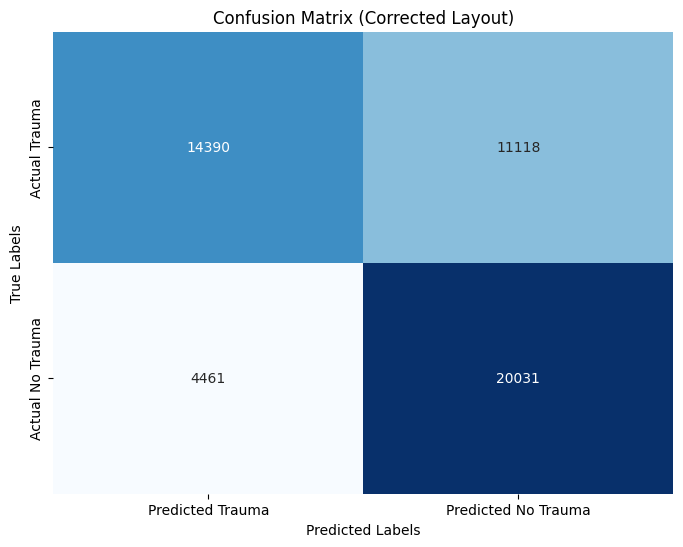

Corrected Confusion Matrix:
[[14390 11118]
 [ 4461 20031]]


In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Step 1: Load the dataset from a file (Add your file path here)
file_path = 'path_to_your_file/medrecords.csv'  # Update this with your actual file path

# Check if the file exists and load the data into a DataFrame
try:
    medrecords_df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")

# Step 2: Prepare the Data
# One-hot encode categorical variables (e.g., 'Gender', 'Age Group', etc.)
categorical_columns = ['Gender', 'Age Group', 'Exam Age']  # Add more if necessary
encoded_df = pd.get_dummies(medrecords_df, columns=categorical_columns, drop_first=True)

# Features (all columns except 'Trauma') and Target (the 'Trauma' column)
X = encoded_df.drop('Trauma', axis=1)
y = encoded_df['Trauma']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define a function to train XGBoost with different hyperparameters
def train_xgboost_with_hyperparams(n_estimators=100, max_depth=6, learning_rate=0.1, min_child_weight=1, gamma=0, subsample=1.0, colsample_bytree=1.0):
    # Initialize the XGBoost classifier with the given hyperparameters
    xgb_model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        eval_metric='logloss'
    )
    
    # Train the model
    xgb_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"XGBoost Performance with n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Step 5: Hyperparameter tuning - Try different configurations of hyperparameters
train_xgboost_with_hyperparams(n_estimators=30, max_depth=3, learning_rate=0.1, min_child_weight=1, gamma=0, subsample=1.0, colsample_bytree=1)
train_xgboost_with_hyperparams(n_estimators=28, max_depth=4, learning_rate=0.1, min_child_weight=2, gamma=0, subsample=1.0, colsample_bytree=1)
train_xgboost_with_hyperparams(n_estimators=32, max_depth=4, learning_rate=0.1, min_child_weight=2, gamma=0, subsample=1.0, colsample_bytree=1)

# Step 6: Generate the confusion matrix for the best-performing model
def plot_confusion_matrix(y_test, y_pred):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Reorder the confusion matrix to match TP, FP, FN, TN layout
    conf_matrix_corrected = np.array([[conf_matrix[1, 1], conf_matrix[0, 1]],  # TP, FP
                                      [conf_matrix[1, 0], conf_matrix[0, 0]]]) # FN, TN

    # Plot the corrected confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_corrected, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=['Predicted Trauma', 'Predicted No Trauma'], 
                yticklabels=['Actual Trauma', 'Actual No Trauma'])
    plt.title('Confusion Matrix (Corrected Layout)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Print the corrected confusion matrix for reference
    print("Corrected Confusion Matrix:")
    print(conf_matrix_corrected)

# Assuming you want to plot the confusion matrix for the best model (you can modify which model's predictions to pass here)
best_model_predictions = xgb_model.predict(X_test)
plot_confusion_matrix(y_test, best_model_predictions)
